<h1 align="center">SALES PERFORMANCE ANALYSIS</h1>

##### In this project, I performed Exploratory Data Analysis (EDA) on a Superstore sales dataset from the United States to understand the overall sales performance. The dataset includes information about products, customers, orders, and profit. Through the EDA process, I cleaned the data, handled missing values and outliers, and analyzed different patterns to extract meaningful business insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Superstore.csv")

In [3]:
df.shape

(9994, 22)

In [4]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9994 non-null   int64  
 1   Row ID         9994 non-null   int64  
 2   Order ID       9994 non-null   object 
 3   Order Date     9994 non-null   object 
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9794 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9794 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

### DATA CLEANING

<h3>Dropping unnecessary and irrelevent columns : </h3>

In [6]:
categorical_cols=df.select_dtypes('object').columns
numerical_cols=df.select_dtypes('number').columns

In [7]:
categorical_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
df.drop('Country',axis=1,inplace=True)

In [10]:
df['State'].nunique()

49

In [11]:
df['City'].nunique()

529

In [12]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
df.drop(['Region','Order ID','Customer ID','Product ID','Ship Date'],axis=1,inplace=True)

In [14]:
numerical_cols

Index(['Unnamed: 0', 'Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
df.drop(['Unnamed: 0','Row ID','Postal Code','Product Name'],axis=1,inplace=True)

<h3>Handling missing values : </h3>

In [16]:
df.isnull().sum()

Order Date         0
Ship Mode          0
Customer Name      0
Segment            0
City             200
State              0
Category         200
Sub-Category       0
Sales            200
Quantity           0
Discount         200
Profit           200
dtype: int64

- The percentage of missing values in each column is very low, making the dataset mostly complete.
- Since the missing values are scattered and minimal, they do not affect the overall dataset quality.
- Because the missing percentage is low, imputing them is better than dropping rows, to avoid unnecessary data loss.

In [17]:
cols_with_null=df.columns[df.isnull().any()].tolist()
cols_with_null

['City', 'Category', 'Sales', 'Discount', 'Profit']

In [18]:
for col in cols_with_null:
    if df[col].dtype !='O':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)
        

C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\615388244.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\615388244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [19]:
df[cols_with_null].isnull().sum()

City        0
Category    0
Sales       0
Discount    0
Profit      0
dtype: int64

<h3>Handling outliers: </h3>

In [20]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,237.156069,3.993896,0.157016,27.113849
std,664.963321,5.722761,0.204614,234.557569
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.856000,2.000000,0.000000,1.814400
50%,54.900000,3.000000,0.200000,8.627100
75%,206.983750,5.000000,0.200000,28.716300
max,22638.480000,140.000000,0.800000,8399.976000


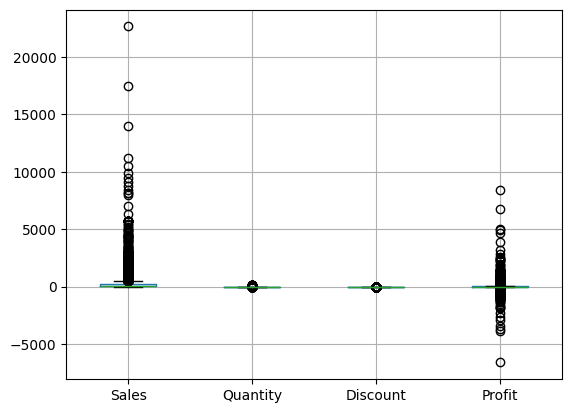

In [21]:
df.boxplot()
plt.show()

In [22]:
print(df[['Category','Sales','Quantity','Discount','Profit']])

             Category     Sales  Quantity  Discount    Profit
0           Furniture  261.9600         2      0.00   41.9136
1           Furniture  731.9400         3      0.00  219.5820
2     Office Supplies   14.6200         2      0.00    6.8714
3           Furniture  957.5775         5      0.45 -383.0310
4     Office Supplies   22.3680         2      0.20    2.5164
...               ...       ...       ...       ...       ...
9989        Furniture   25.2480         3      0.20    4.1028
9990        Furniture   91.9600         2      0.00   15.6332
9991       Technology  258.5760         2      0.20   19.3932
9992  Office Supplies   29.6000         4      0.00   13.3200
9993  Office Supplies  243.1600         2      0.00   72.9480

[9994 rows x 5 columns]


In [23]:
df['Sales'].aggregate(['min','max'])

min        0.444
max    22638.480
Name: Sales, dtype: float64

In [24]:
df['Quantity'].unique()

array([  2,   3,   5,   7,   4,   6,   9,   1,   8,  14,  11,  13,  10,
        12, 140])

#### Outliers were not removed
##### Because:
- These outliers may are natural business variations
- Outliers represent important customer behaviours
- Removing outliers would remove meaningful information
- Financial data is naturally skewed

#### FEATURE EXTRACTION

In [25]:
df['Order Date'].nunique()

1237

In [26]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [27]:
df['Order Year']=df['Order Date'].dt.year
df['Order Year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: Order Year, dtype: int32

In [28]:
df['Order Month']=df['Order Date'].dt.month
df['Order Month'].head()

0    11
1    11
2     6
3    10
4    10
Name: Order Month, dtype: int32

In [29]:
df.drop('Order Date',axis=1,inplace=True)

In [30]:
categorical_cols=df.select_dtypes('object').columns
numerical_cols=df.select_dtypes('number').columns
print('Categorical cols: ',categorical_cols,'\n Numerical columns: ',numerical_cols)

Categorical cols:  Index(['Ship Mode', 'Customer Name', 'Segment', 'City', 'State', 'Category',
       'Sub-Category'],
      dtype='object') 
 Numerical columns:  Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month'], dtype='object')


- Converted the ‘Order Date’ column into datetime format so that time-based features can be extracted accurately.
- Extracted the ‘Year’ from the order date to analyze sales and profit trends across different years.
- Extracted the ‘Month’ from the order date to study monthly patterns, seasonal effects, and peak sales months.

## INSIGHTS

>## *Sales and Profit by Category :*

In [31]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\1600115886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category',y='Sales',data=df,ax=axes[0],estimator='sum',palette="flare") #For each Category, calculate the sum of Sales
C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\1600115886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category',y='Profit',data=df,ax=axes[1],estimator='sum',palette='flare')


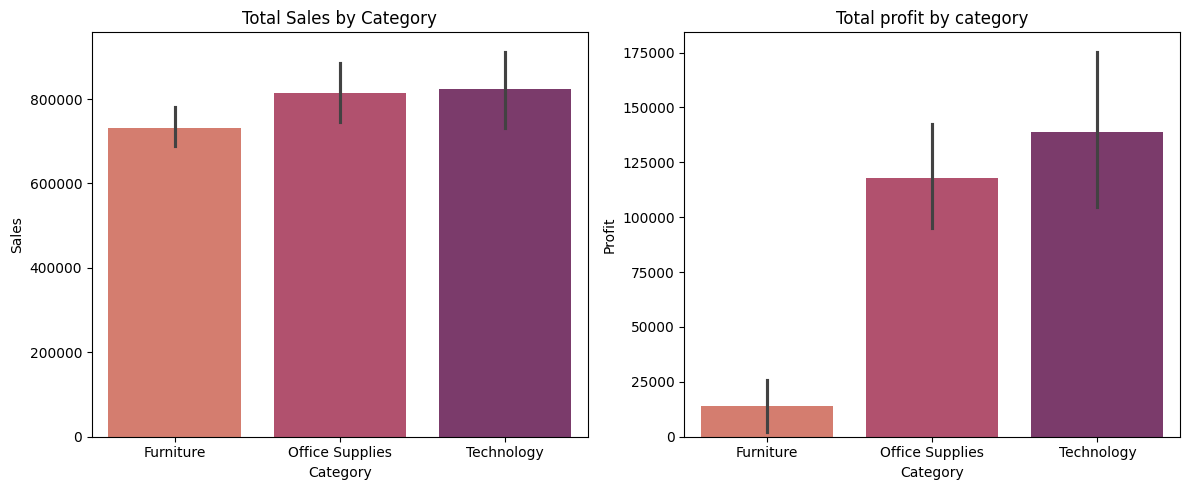

In [32]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.barplot(x='Category',y='Sales',data=df,ax=axes[0],estimator='sum',palette="flare") #For each Category, calculate the sum of Sales
sns.barplot(x='Category',y='Profit',data=df,ax=axes[1],estimator='sum',palette='flare')
axes[0].set_title('Total Sales by Category')
axes[1].set_title('Total profit by category')
plt.tight_layout()
plt.show()


##### Technology generates the highest sales, followed by Office Supplies and then Furniture

##### Technogy is the most profitable category,while furniture , the least profitable category

>## *Sales and Profit by Sub-Category*

In [33]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\3751206932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category',y='Sales',data=df, ax=axes[0],estimator='sum',palette='flare')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\3751206932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category',y='Profit',data=df,ax=axes[1], estimator='sum',palette='flare')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\3751206932.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\3751

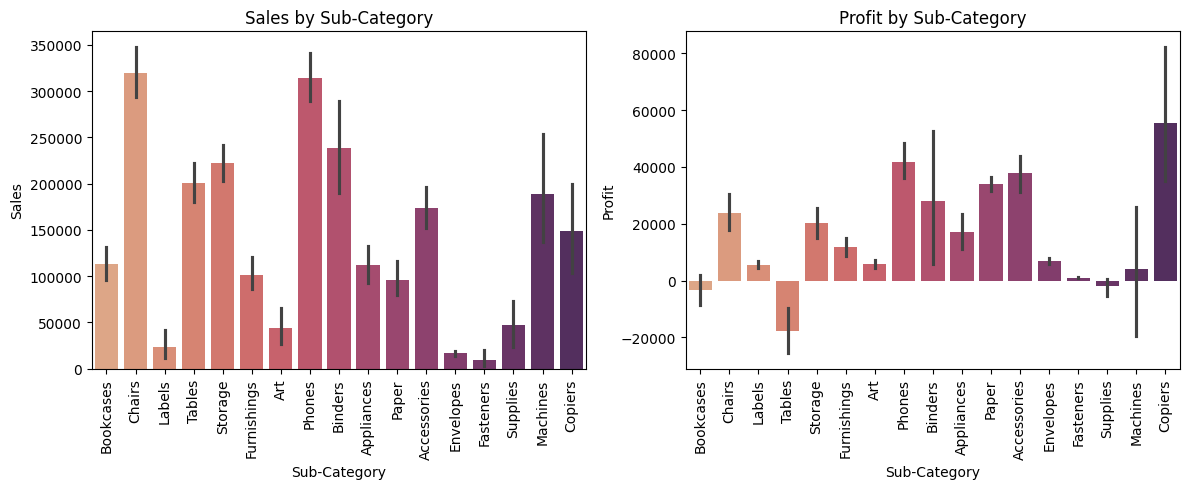

In [34]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.barplot(x='Sub-Category',y='Sales',data=df, ax=axes[0],estimator='sum',palette='flare')
sns.barplot(x='Sub-Category',y='Profit',data=df,ax=axes[1], estimator='sum',palette='flare')
axes[0].set_title('Sales by Sub-Category')
axes[1].set_title('Profit by Sub-Category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

##### Chairs,Phones and Binders are found to be the top-selling sub categories

##### We found that Copiers brings most profit while tables are mostly in loss

>## *Segment wise Sales and Profit*

In [35]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

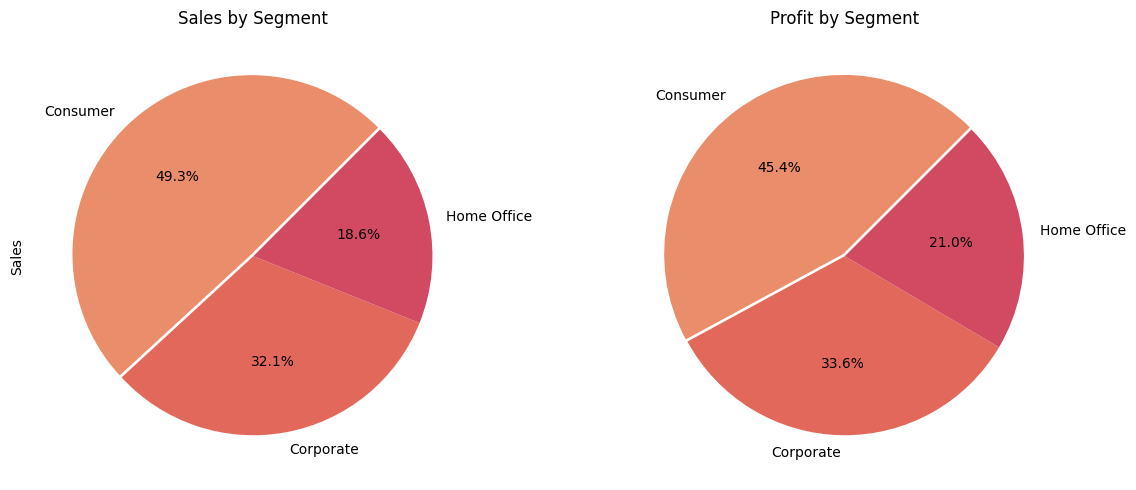

In [36]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
df.groupby('Segment')['Sales'].sum().plot(kind='pie',autopct='%1.1f%%',startangle=45,explode=[0.015,0.0,0.0],ax=axes[0],colors=sns.color_palette('flare'))
df.groupby('Segment')['Profit'].sum().plot(kind='pie',autopct='%1.1f%%',startangle=45,explode=[0.015,0.0,0.0],ax=axes[1],colors=sns.color_palette('flare'))
axes[0].set_title('Sales by Segment')
axes[1].set_title('Profit by Segment')
plt.ylabel(' ')
plt.tight_layout()
plt.show()

##### Consumer segment accounts for the highest share of total sales with 49.3% and also for the highest share of total profit with 45.4%

>## *Discount v/s Profit Relationship*

In [37]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

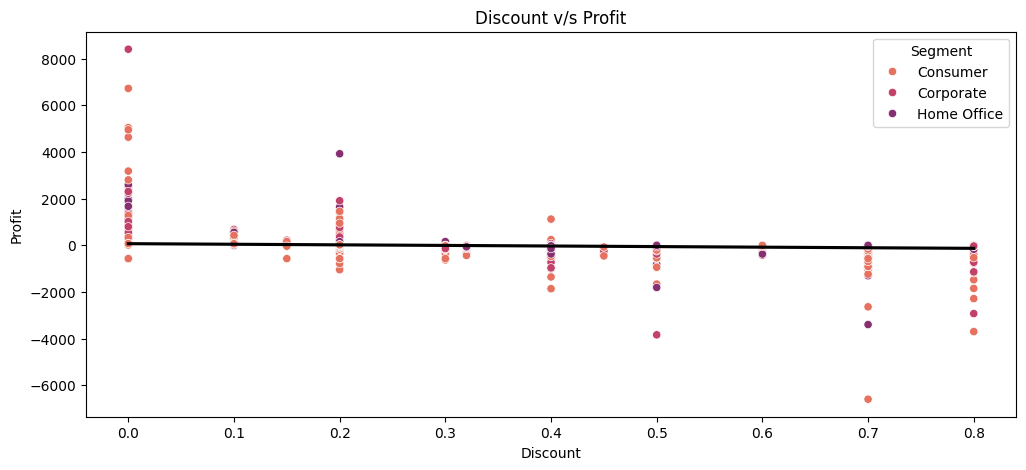

In [38]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Discount', y='Profit', hue='Segment', palette='flare', data=df)
sns.regplot(x='Discount', y='Profit', data=df, scatter=False, color='black')
plt.title("Discount v/s Profit")
plt.show()


##### Profit decreases as discount increases
##### High discounts (≥ 40%) almost always result in losses
##### Zero discount orders have the highest profits
##### Profit variability exists even at low discounts (0–20%)

>## *Top 10 most profitable states*

In [39]:
top_10_states=df.groupby('State')['Profit'].sum().nlargest(10)

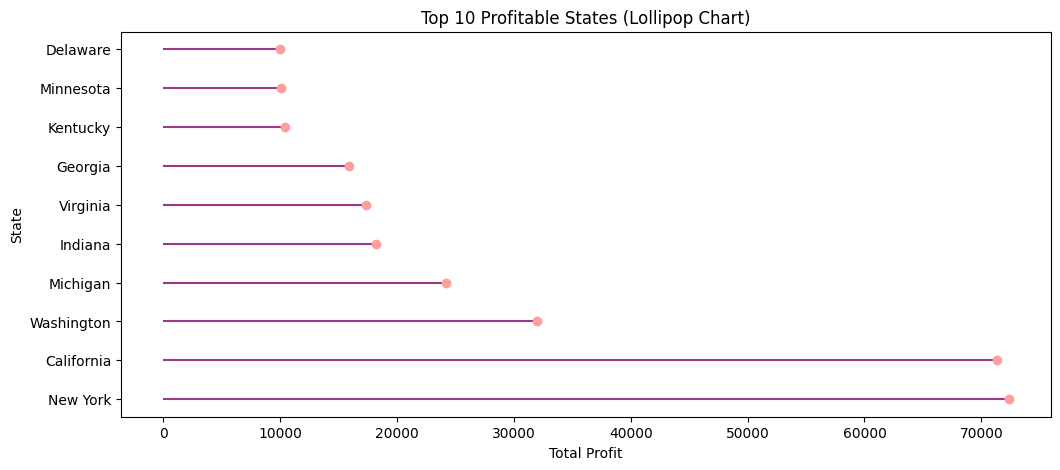

In [40]:
plt.figure(figsize=(12,5))
plt.hlines(y=top_10_states.index, xmin=0, xmax=top_10_states.values, color="#9C3987")
plt.plot(top_10_states.values, top_10_states.index, "o", color='#ff9f9b')
plt.title("Top 10 Profitable States (Lollipop Chart)")
plt.xlabel("Total Profit")
plt.ylabel("State")
plt.show()

##### States like New York and California seems to produce highest profit , that means, there must be having stronger customer activity and better product marketting

>## *Top 10 most profitable cities*

In [41]:
top_10_cities=df.groupby('City')['Profit'].sum().nlargest(10)

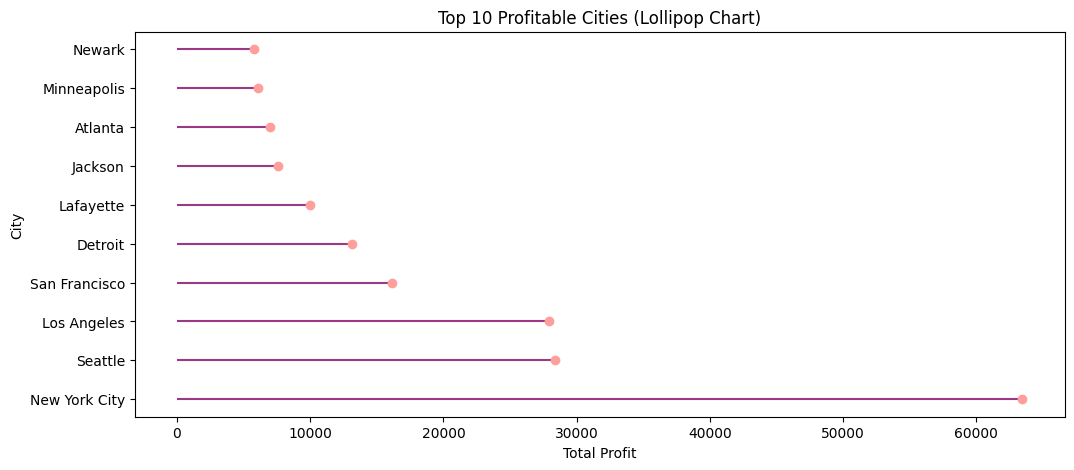

In [42]:
plt.figure(figsize=(12,5))
plt.hlines(y=top_10_cities.index, xmin=0, xmax=top_10_cities.values, color="#9C3987")
plt.plot(top_10_cities.values, top_10_cities.index, "o", color='#ff9f9b')
plt.title("Top 10 Profitable Cities (Lollipop Chart)")
plt.xlabel("Total Profit")
plt.ylabel("City")
plt.show()

##### Here New York City seems to produce highest profit , that means, there must be having stronger customer activity and better product marketting

>## *Most Preferred Shipping Mode*

C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\2396722791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode',data=df,palette='flare')


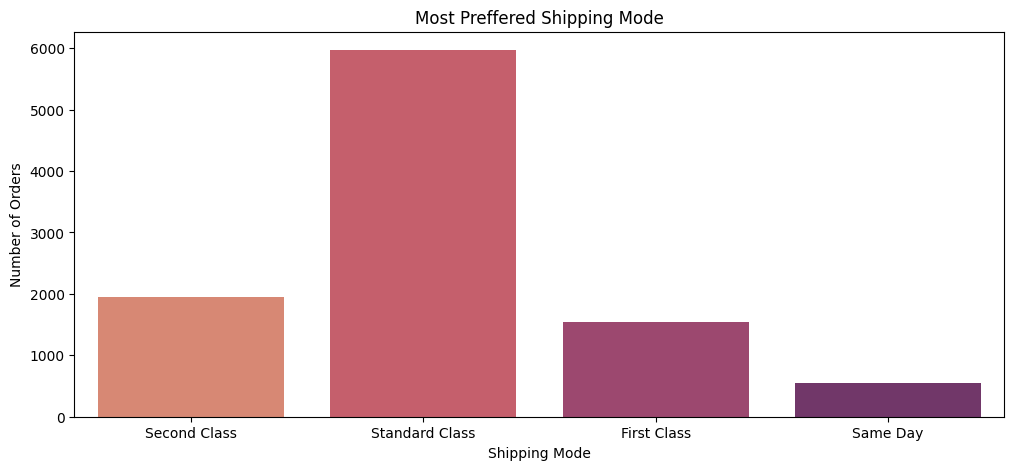

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(x='Ship Mode',data=df,palette='flare')
plt.title('Most Preffered Shipping Mode')
plt.xlabel("Shipping Mode")
plt.ylabel("Number of Orders")
plt.show()

##### Standard Class is the most preferred shipping mode,This means customers commonly choose cost-effective and moderate-speed delivery.

>## *Sales vs Profit Relationship*

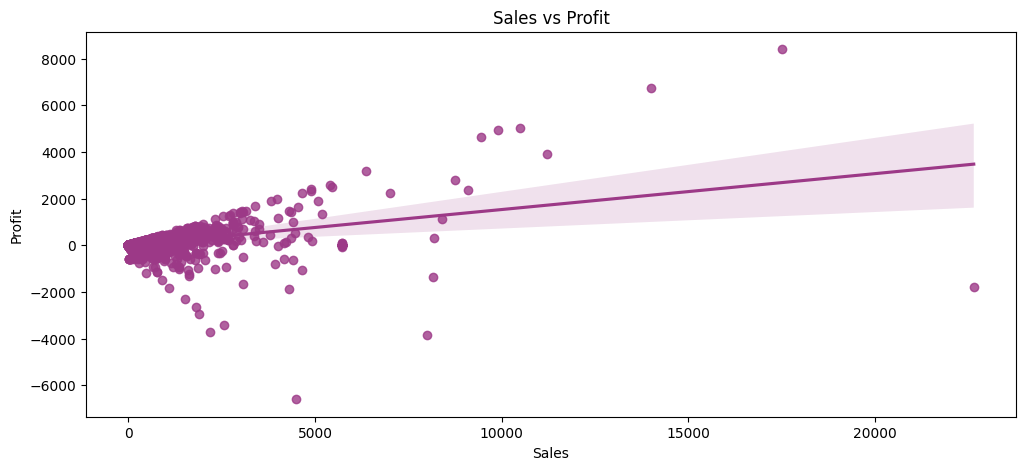

In [44]:
plt.figure(figsize=((12,5)))
sns.regplot(x='Sales', y='Profit', data=df,color="#9C3987")
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

##### There is a weak positive relationship between Sales and Profit
##### A number of products with high sales still have losses

>## *Monthly and Yearly Sales Trend by Category*

In [45]:
df.columns

Index(['Ship Mode', 'Customer Name', 'Segment', 'City', 'State', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month'],
      dtype='object')

In [46]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

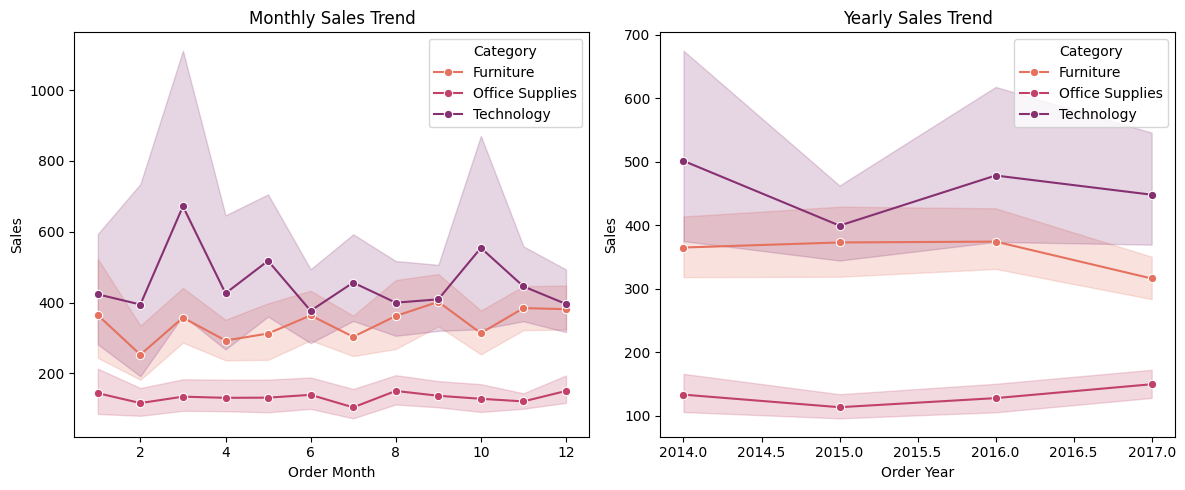

In [47]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x='Order Month',y="Sales",marker='o',palette='flare',hue='Category',data=df,ax=axes[0])
sns.lineplot(x='Order Year',y='Sales',marker='o',hue='Category',data=df,palette='flare',ax=axes[1])
axes[0].set_title('Monthly Sales Trend')
axes[1].set_title('Yearly Sales Trend')
plt.tight_layout()
plt.show()

##### Technology spikes sharply in Month 3 and Month 10 with highest variation (big shaded region)
##### Office Supplies also shows small peaks around Month 3, 5, and 10
##### Month 2 and Month 7 show slight drops across all categories
##### Office Supplies and Furniture show stable trends

##### Technology consistently drives the highest yearly sales, with notable ups and downs indicating seasonal or product-dependent demand.
##### 2016 appears to be the strongest year overall



>## *Customer buying Patterns*

C:\Users\Admin\AppData\Local\Temp\ipykernel_2384\2200621326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='flare')


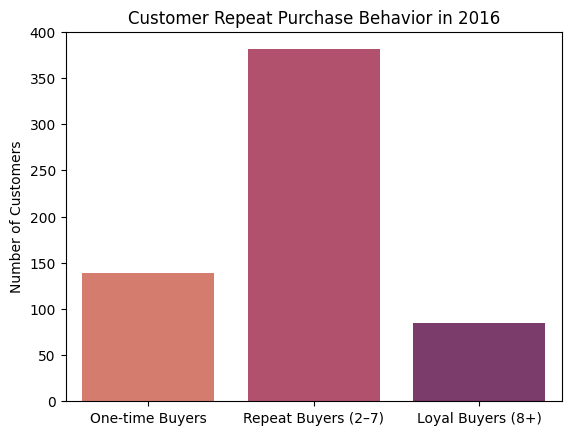

In [48]:
year = 2016
df_year = df[df['Order Year'] == year]
purchase_counts_year = df_year['Customer Name'].value_counts()
one_time = purchase_counts_year[purchase_counts_year == 1].count()
repeat = purchase_counts_year[(purchase_counts_year >= 2) & (purchase_counts_year < 7)].count()
loyal = purchase_counts_year[purchase_counts_year >= 8].count()
labels = ['One-time Buyers', 'Repeat Buyers (2–7)', 'Loyal Buyers (8+)']
values = [one_time, repeat, loyal]
sns.barplot(x=labels, y=values, palette='flare')
plt.title(f'Customer Repeat Purchase Behavior in {year}')
plt.ylabel('Number of Customers')
plt.show()


##### Majority of customers in 2016 were repeat buyers (2–7 purchases) and they form the core customer base
##### A notable number of customers are loyal buyers (8+ purchases) also suggests strong product satisfaction
##### One-time buyers are significantly fewer than repeat buyers

## ENCODING

In [49]:
categorical_cols=df.select_dtypes('object')

for i in categorical_cols:
    print("Unique values in",i,":",categorical_cols[i].value_counts().head(4).index.to_list(),categorical_cols[i].nunique())

Unique values in Ship Mode : ['Standard Class', 'Second Class', 'First Class', 'Same Day'] 4
Unique values in Customer Name : ['William Brown', 'John Lee', 'Paul Prost', 'Matt Abelman'] 793
Unique values in Segment : ['Consumer', 'Corporate', 'Home Office'] 3
Unique values in City : ['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco'] 529
Unique values in State : ['California', 'New York', 'Texas', 'Pennsylvania'] 49
Unique values in Category : ['Office Supplies', 'Furniture', 'Technology'] 3
Unique values in Sub-Category : ['Binders', 'Paper', 'Furnishings', 'Phones'] 17


| Feature Name     | Encoding Type        | Reason for Selecting This Encoding                                               |
|------------------|---------------------|----------------------------------------------------------------------------------|
| Ship Mode        | One-Hot Encoding    | Fewer than 6 unique categories, nominal data, One-Hot encoding is well-suited    |
| Segment          | One-Hot Encoding    | Nominal feature with very few categories, One-Hot encoding avoids ordinality     |
| Category         | One-Hot Encoding    | Only 3 categories, nominal, improves interpretability                            |
| Customer Name    | Frequency Encoding  | Very high cardinality, frequency encoding avoids excessive columns and overfitting|
| City             | Frequency Encoding  | High cardinality, frequency encoding scales efficiently and prevents data explosion|
| State            | Frequency Encoding  | Moderate/high cardinality, frequency encoding is efficient and avoids data sparsity|
| Sub-Category     | Frequency Encoding  | More than 6 unique values, frequency encoding balances dimensionality and info    |


In [50]:
one_hot=['Ship Mode','Segment','Category']
frequency=['Customer Name','City','State','Sub-Category']

In [51]:
from sklearn.preprocessing import OneHotEncoder
for col in one_hot:
    ohe=OneHotEncoder(drop='if_binary',sparse_output=False)
    encoded=ohe.fit_transform(df[[col]])
    df1=pd.DataFrame(encoded,columns=ohe.get_feature_names_out([col]),index=df.index)
    df.drop(col,axis=1,inplace=True)
    df=pd.concat([df,df1],axis=1)
df.head()

,Customer Name,City,State,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,Claire Gute,Henderson,Kentucky,Bookcases,261.9600,2,0.00,41.9136,2016,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Claire Gute,Henderson,Kentucky,Chairs,731.9400,3,0.00,219.5820,2016,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Darrin Van Huff,Los Angeles,California,Labels,14.6200,2,0.00,6.8714,2016,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Sean O'Donnell,Fort Lauderdale,Florida,Tables,957.5775,5,0.45,-383.0310,2015,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Sean O'Donnell,Fort Lauderdale,Florida,Storage,22.3680,2,0.20,2.5164,2015,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [52]:
from category_encoders import CountEncoder
for col in frequency:
    ce=CountEncoder(cols=[col])
    df[col]=ce.fit_transform(df[col])
df.head()

,Customer Name,City,State,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,5,50,139,228,261.9600,2,0.00,41.9136,2016,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5,50,139,617,731.9400,3,0.00,219.5820,2016,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,9,729,2001,364,14.6200,2,0.00,6.8714,2016,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,15,383,319,957.5775,5,0.45,-383.0310,2015,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,15,15,383,846,22.3680,2,0.20,2.5164,2015,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## SCALING

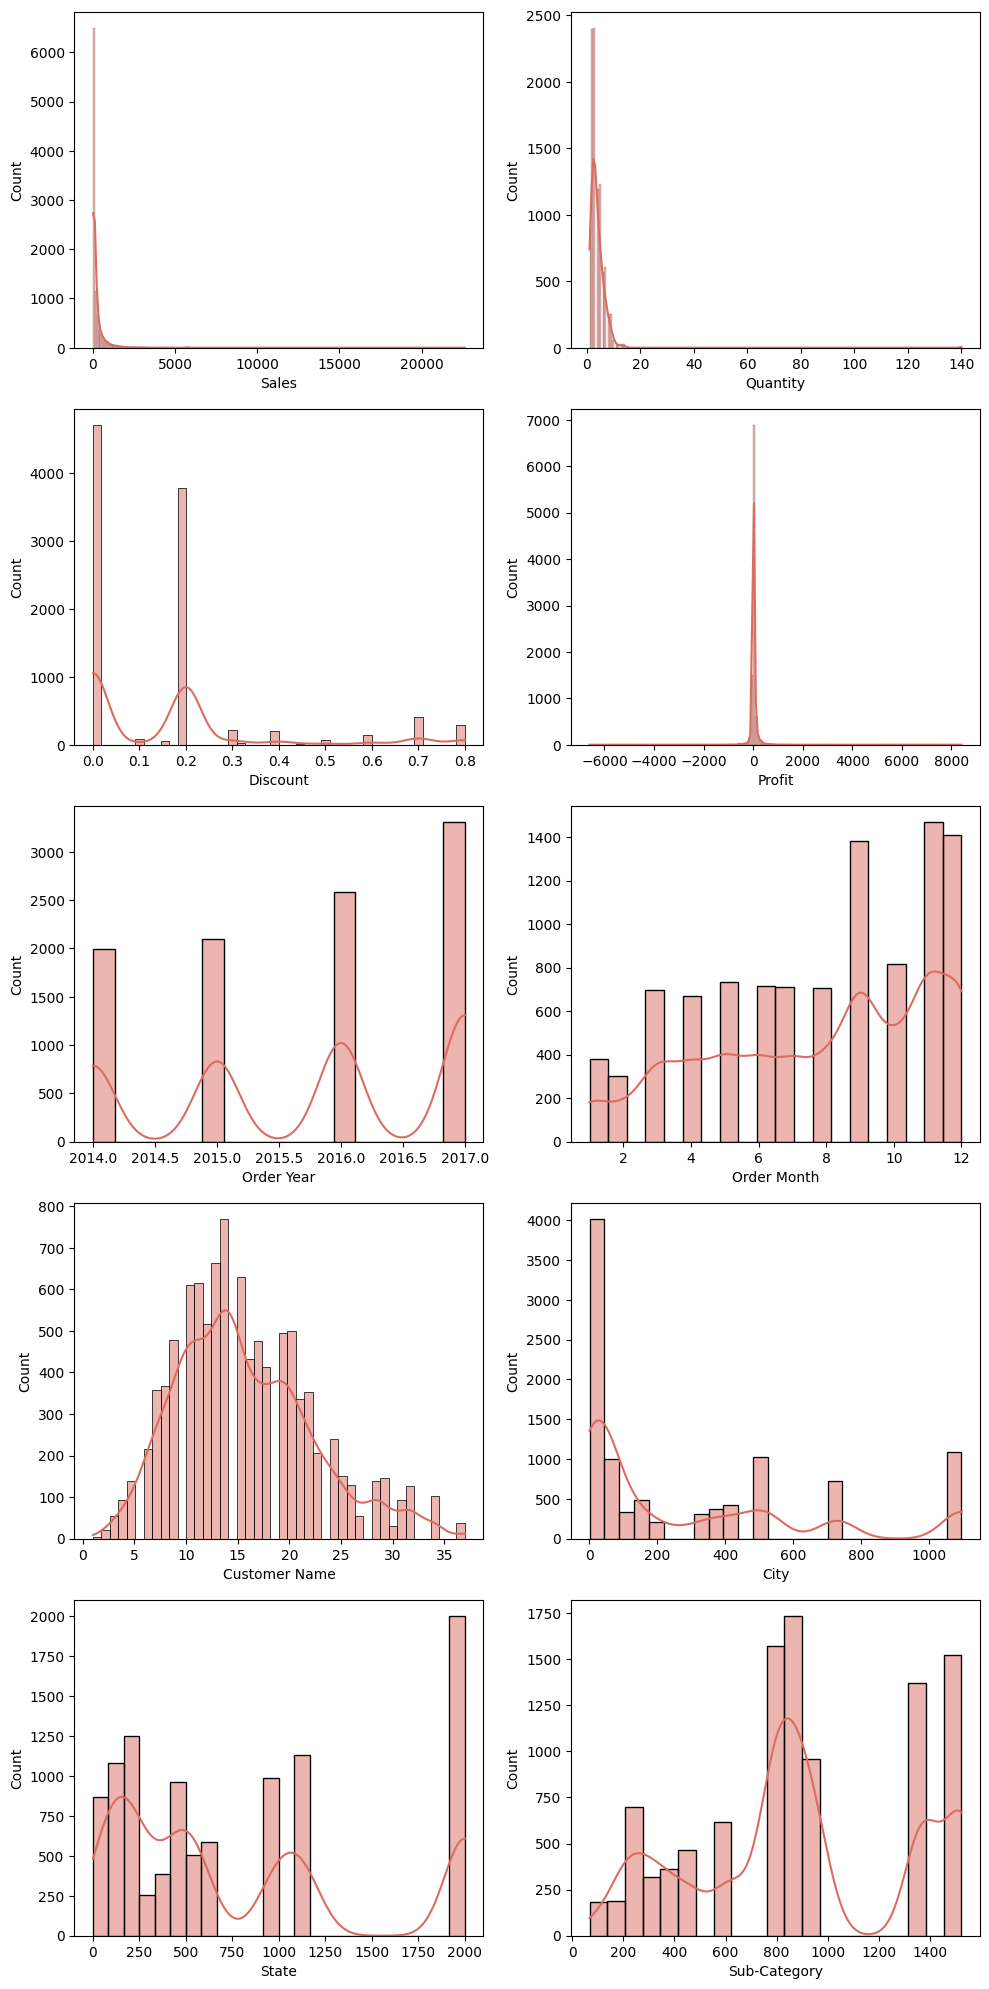

In [53]:
fig,axes=plt.subplots(5,2, figsize=(10,20))

sns.histplot(df['Sales'],kde=True,ax=axes[0,0],color='#db6c61')
sns.histplot(df['Quantity'],kde=True,ax=axes[0,1],color='#db6c61')
sns.histplot(df['Discount'],kde=True,ax=axes[1,0],color='#db6c61')
sns.histplot(df['Profit'],kde=True,ax=axes[1,1],color='#db6c61')
sns.histplot(df['Order Year'],kde=True,ax=axes[2,0],color='#db6c61')
sns.histplot(df['Order Month'],kde=True,ax=axes[2,1],color='#db6c61')
sns.histplot(df['Customer Name'],kde=True,ax=axes[3,0],color='#db6c61')
sns.histplot(df['City'],kde=True,ax=axes[3,1],color='#db6c61')
sns.histplot(df['State'],kde=True,ax=axes[4,0],color='#db6c61')
sns.histplot(df['Sub-Category'],kde=True,ax=axes[4,1],color='#db6c61')
plt.tight_layout()
plt.show()

#### We can see that none of graphs falls under normal distribution, so that we can't use StandardScaler for any of the feature

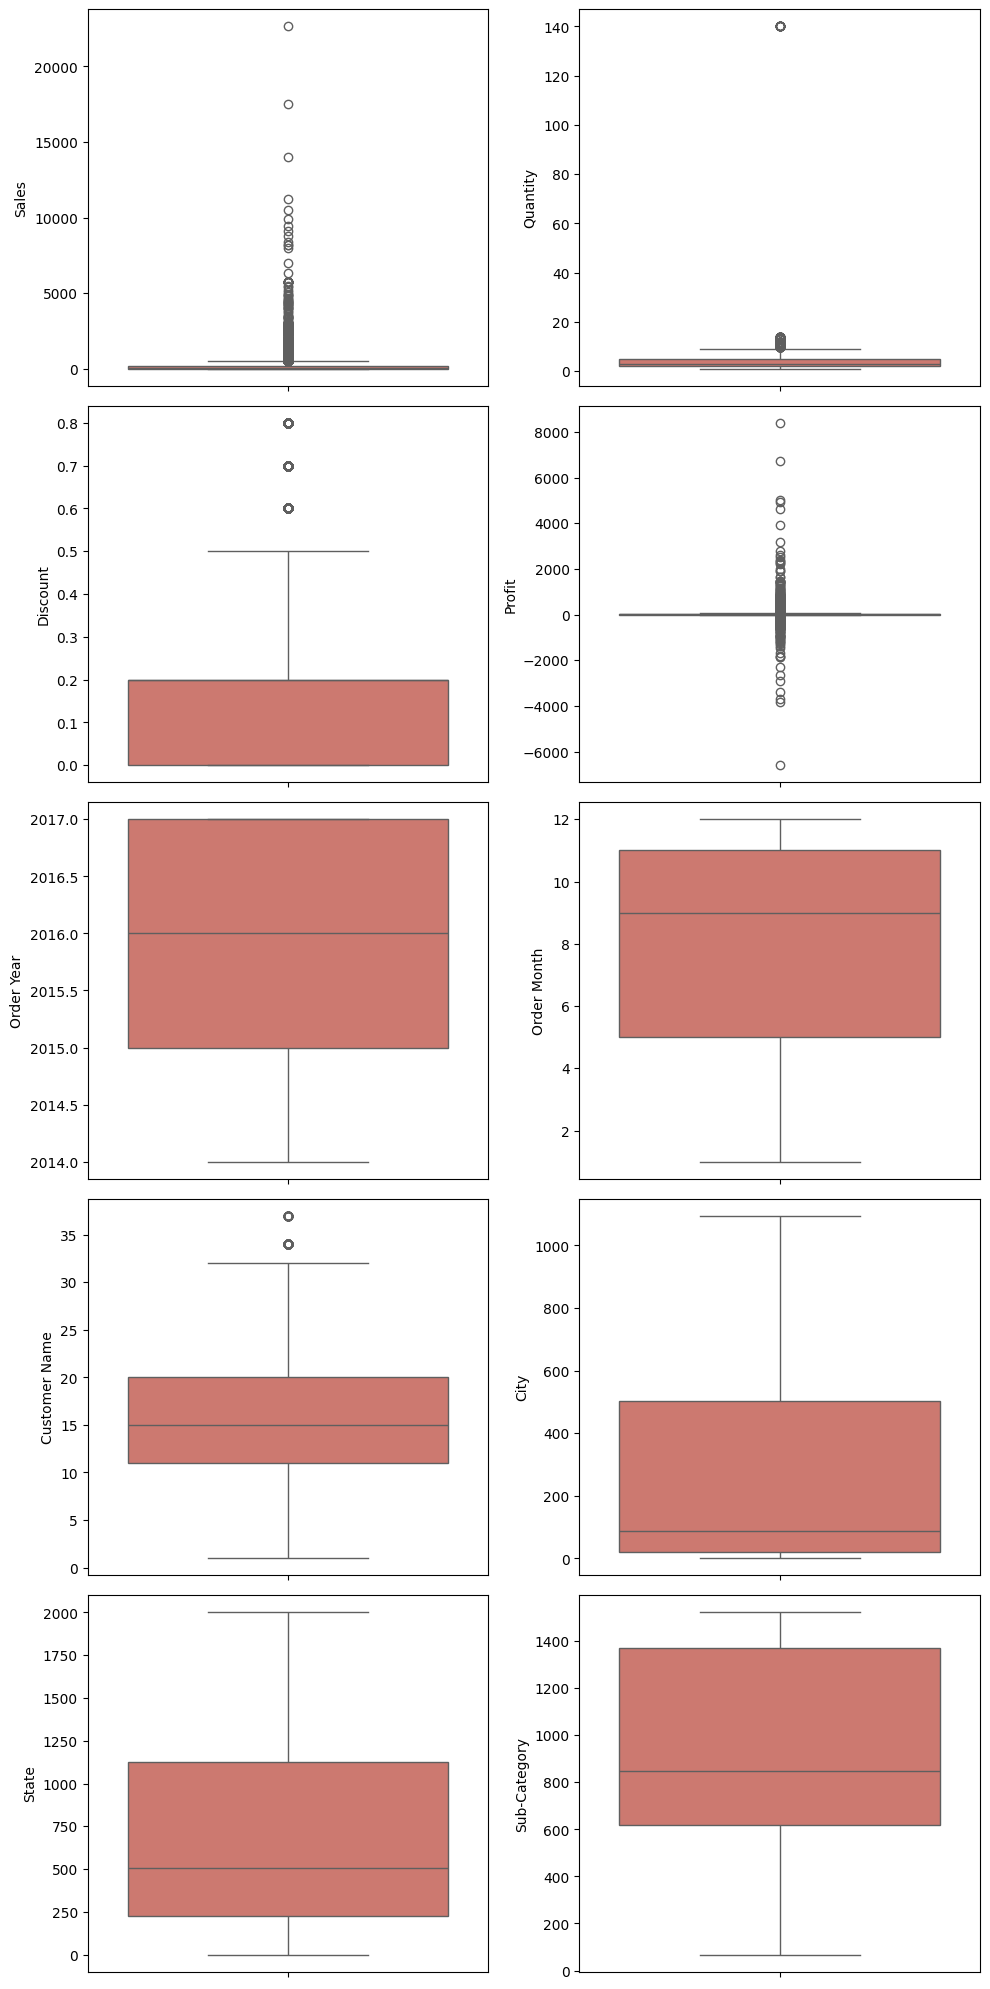

In [54]:
fig,axes=plt.subplots(5,2, figsize=(10,20))

sns.boxplot(df['Sales'],ax=axes[0,0],color='#db6c61')
sns.boxplot(df['Quantity'],ax=axes[0,1],color='#db6c61')
sns.boxplot(df['Discount'],ax=axes[1,0],color='#db6c61')
sns.boxplot(df['Profit'],ax=axes[1,1],color='#db6c61')
sns.boxplot(df['Order Year'],ax=axes[2,0],color='#db6c61')
sns.boxplot(df['Order Month'],ax=axes[2,1],color='#db6c61')
sns.boxplot(df['Customer Name'],ax=axes[3,0],color='#db6c61')
sns.boxplot(df['City'],ax=axes[3,1],color='#db6c61')
sns.boxplot(df['State'],ax=axes[4,0],color='#db6c61')
sns.boxplot(df['Sub-Category'],ax=axes[4,1],color='#db6c61')
plt.tight_layout()
plt.show()

#### From the above boxplots we understand that some of the features have many outliers , for those features we can use Robust scaler and for rest others we can use minmax scaler

In [55]:
outlier_cols=['Sales','Quantity','Discount','Profit']
one_hot_encoded=['Ship Mode_First Class',
                 'Ship Mode_Same Day',
                 'Ship Mode_Second Class',
                 'Ship Mode_Standard Class',
                 'Segment_Consumer',
                 'Segment_Corporate',
                 'Segment_Home Office',
                 'Category_Furniture',
                 'Category_Office Supplies',
                 'Category_Technology']
minmax=[]
for col in df:
    if (col not in outlier_cols) and (col not in one_hot_encoded):
        minmax.append(col)
minmax

['Customer Name', 'City', 'State', 'Sub-Category', 'Order Year', 'Order Month']

In [56]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
for col in outlier_cols:
    df[col]=scaler.fit_transform(df[[col]])
df.head()


,Customer Name,City,State,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,5,50,139,228,1.094816,-0.333333,-1.00,1.237329,2016,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5,50,139,617,3.579803,0.000000,-1.00,7.841636,2016,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,9,729,2001,364,-0.212978,-0.333333,-1.00,-0.065263,2016,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,15,383,319,4.772845,0.666667,1.25,-14.558752,2015,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,15,15,383,846,-0.172011,-0.333333,0.00,-0.227148,2015,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for col in minmax:
    df[col]=scaler.fit_transform(df[[col]])
df.head()

,Customer Name,City,State,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,0.111111,0.044790,0.069,0.109966,1.094816,-0.333333,-1.00,1.237329,0.666667,0.909091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,0.044790,0.069,0.377320,3.579803,0.000000,-1.00,7.841636,0.666667,0.909091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.222222,0.665448,1.000,0.203436,-0.212978,-0.333333,-1.00,-0.065263,0.666667,0.454545,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.388889,0.012797,0.191,0.172509,4.772845,0.666667,1.25,-14.558752,0.333333,0.818182,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.388889,0.012797,0.191,0.534708,-0.172011,-0.333333,0.00,-0.227148,0.333333,0.818182,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
df.to_csv("sales_encoded.csv")

## CONCLUSION

- Technology and Office Supplies emerge as the top-performing categories in terms of both sales and profitability, while Furniture shows inconsistency and includes several loss-making items.
- The Consumer segment contributes the highest number of orders, proving it to be the primary revenue driver for the business.
- The discount–profit relationship is clearly negative: higher discounts tend to reduce profit and often result in losses, suggesting the need for better pricing or discount strategies.
- Shipping behavior reveals that Standard Class is the most preferred shipping mode, indicating customer preference for cost-effective delivery options
- Overall, the analysis helps identify high-performing product lines, loss-making segments, sales patterns, customer behavior trends, and discount-related risks, providing valuable insights to improve business decisions and optimize profitability.